<a href="https://colab.research.google.com/github/cvs2010/udemyDeepLearning/blob/main/Projeto_2_Prevendo_Lucros.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto 2 - Prevendo Lucros #

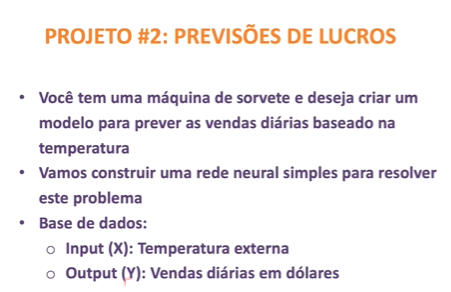


Base de dados:

*   Input (X): Temperatura
*   Output (Y): Lucro diário em dólares

# Etapa 1 - Importação de Bibliotecas

In [116]:
%tensorflow_version 2.x
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
tf.__version__

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


'2.12.0'

# Etapa 2 - Importação da base de dados

In [117]:
# Leitura do arquivo csv

!wget https://github.com/cvs2010/udemyDeepLearning/raw/main/SalesData.csv

--2023-04-18 01:18:02--  https://github.com/cvs2010/udemyDeepLearning/raw/main/SalesData.csv
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/cvs2010/udemyDeepLearning/main/SalesData.csv [following]
--2023-04-18 01:18:02--  https://raw.githubusercontent.com/cvs2010/udemyDeepLearning/main/SalesData.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12385 (12K) [text/plain]
Saving to: ‘SalesData.csv.1’

SalesData.csv.1     100%[===================>]  12.09K  --.-KB/s    in 0s      

2023-04-18 01:18:03 (67.0 MB/s) - ‘SalesData.csv.1’ saved [12385/12385]



In [118]:
# Vizualição dos registros do DataFrame
sales_df = pd.read_csv('/content/SalesData.csv')
sales_df.reset_index(drop = True, inplace = True)

In [119]:
sales_df.head(10)

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194
5,14.352514,367.940744
6,13.707780,308.894518
7,30.833985,696.716640
8,0.976870,55.390338
9,31.669465,737.800824


In [120]:
sales_df.tail(10)

,Temperature,Revenue
490,23.824922,584.399945
491,34.472169,809.352519
492,23.056214,552.819351
493,14.931506,377.430928
494,25.112066,571.434257
495,22.274899,524.746364
496,32.893092,755.818399
497,12.588157,306.090719
498,22.362402,566.217304
499,28.957736,655.660388


In [121]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  500 non-null    float64
 1   Revenue      500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


In [122]:
sales_df.describe()

,Temperature,Revenue
count,500.000000,500.000000
mean,22.232225,521.570777
std,8.096388,175.404751
min,0.000000,10.000000
25%,17.122258,405.558681
50%,22.392791,529.368565
75%,27.740674,642.257922
max,45.000000,1000.000000


# Etapa 3: Visualização da base de dados

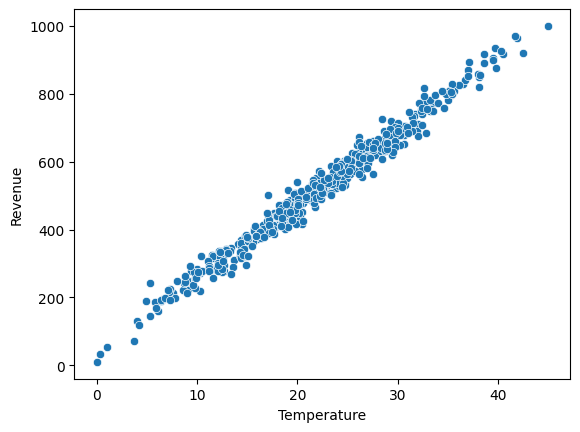

In [123]:
#sns.scatterplot(temperature_df['Temperature'], revenue_df['Revenue']);
sns.scatterplot(x=sales_df['Temperature'], y=sales_df['Revenue']); # se inserir esse ';' no final o cabeçalho desaparece (try)

# Etapa 4: Criação das variáveis da base de dados

In [124]:
# Criação das variáveis X_train e y_train
X_train = sales_df['Temperature']
y_train = sales_df['Revenue']

In [125]:
# Formato da variável X_train
X_train.shape

(500,)

In [126]:
# Formato da variável y_train
y_train.shape

(500,)

# Etapa 5: Criação e construção do modelo

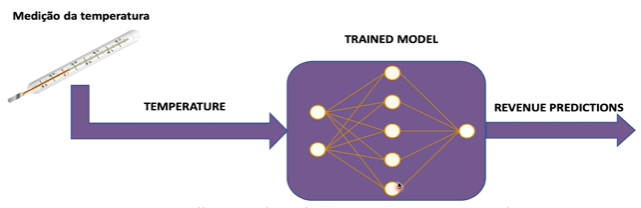

In [127]:
# Construção do modelo sequencial

model = tf.keras.Sequential() # Criando sequencia de camadas
model.add(tf.keras.layers.Dense(units = 50, input_shape = [1])) # units = 10 neurônios na camada oculta; input_shape = 1 neurônio na entrada
model.add(tf.keras.layers.Dense(units = 1, input_shape = [50])) # units = 10 neurônios na camada oculta; input_shape = 10 neurônio na entrada

In [128]:
# Sumário do modelo
model.summary() # Veja que agora a 1ª camada Densa de 1 neurônio se liga a outros 10 neurônios da 2ª camada

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 50)                100       
                                                                 
 dense_3 (Dense)             (None, 1)                 51        
                                                                 
Total params: 151
Trainable params: 151
Non-trainable params: 0
_________________________________________________________________


In [129]:
# Compilar o modelo
model.compile(optimizer=tf.keras.optimizers.Adam(0.1), loss = 'mean_squared_error')

In [130]:
# Treinamento - 1000 ÉPOCAS
epochs_hist = model.fit(X_train,
                        y_train,
                        epochs = 1000)

Epoch 1/1000
16/16 [==============================] - 1s 2ms/step - loss: 90563.3672
Epoch 2/1000
16/16 [==============================] - 0s 2ms/step - loss: 8325.6191
Epoch 3/1000
16/16 [==============================] - 0s 2ms/step - loss: 1717.1207
Epoch 4/1000
16/16 [==============================] - 0s 2ms/step - loss: 830.3074
Epoch 5/1000
16/16 [==============================] - 0s 2ms/step - loss: 801.0262
Epoch 6/1000
16/16 [==============================] - 0s 3ms/step - loss: 685.4581
Epoch 7/1000
16/16 [==============================] - 0s 2ms/step - loss: 673.7961
Epoch 8/1000
16/16 [==============================] - 0s 2ms/step - loss: 670.6851
Epoch 9/1000
16/16 [==============================] - 0s 2ms/step - loss: 659.1497
Epoch 10/1000
16/16 [==============================] - 0s 2ms/step - loss: 655.1345
Epoch 11/1000
16/16 [==============================] - 0s 2ms/step - loss: 643.1636
Epoch 12/1000
16/16 [==============================] - 0s 2ms/step - loss: 656.46

# Etapa 6: Avaliação do modelo

In [131]:
epochs_hist.history.keys()

dict_keys(['loss'])

In [132]:
model.get_weights()

[array([[-3.7023835e-03,  4.7922488e-03,  4.3963911e-03, -1.1328483e-04,
         -2.5976900e-04,  9.6876509e-03,  1.8865530e-03,  6.0519585e-03,
          4.2182584e-03,  2.9228856e-03,  5.4907102e-02, -5.1297150e-03,
          5.4005561e-03,  2.1645911e-03,  1.7302365e-03,  2.6097894e-03,
         -9.4573619e-03, -3.4523334e-03,  5.5164583e-03, -9.2736110e-02,
          7.3223421e-04,  9.7990199e-04, -4.2855199e-03, -4.0891035e-03,
         -5.4223915e-03,  9.6673677e-03, -6.0321316e-03, -1.0339113e-02,
          5.9212483e-03, -3.7810627e-02,  5.9781647e-03, -3.9616735e-03,
         -3.7455109e-03,  3.3608782e-03,  9.2104068e-03,  1.4890742e-03,
          1.1990741e-03,  7.7864863e-03, -2.4736168e+00,  1.0998155e-03,
          2.6336005e-03,  3.8314676e+00,  3.9025452e-03,  7.9389932e-03,
         -7.7735693e-03, -3.0475694e-03,  5.0831158e-02,  8.8972626e-03,
         -1.1668221e-02,  4.2026443e-03]], dtype=float32),
 array([ 1.30890787e-01, -1.35601133e-01, -1.21030979e-01,  3.075

16/16 [==============================] - 0s 2ms/step


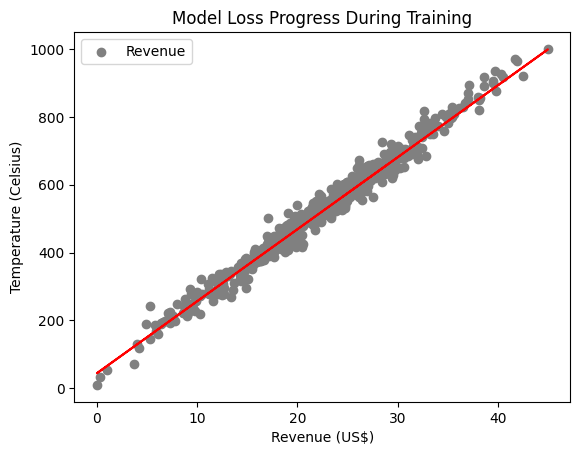

In [133]:
plt.scatter(X_train, y_train, color= 'gray')
plt.title('Model Loss Progress During Training')
plt.plot(X_train , model.predict(X_train), color = 'red')
plt.xlabel('Revenue (US$)')
plt.ylabel('Temperature (Celsius)')
plt.legend(['Revenue']);

In [134]:
temp = 5
revenue = model.predict([temp])
revenue_float = float(revenue)
print('The prediction of the model is U$S', revenue)

1/1 [==============================] - 0s 87ms/step
The prediction of the model is U$S [[150.53256]]


# SKlearn

In [135]:
X_train.shape
X_train

0      24.566884
1      26.005191
2      27.790554
3      20.595335
4      11.503498
         ...    
495    22.274899
496    32.893092
497    12.588157
498    22.362402
499    28.957736
Name: Temperature, Length: 500, dtype: float64

In [136]:
X_train = X_train.values.reshape(-1,1)

In [137]:
X_train.shape

(500, 1)

In [138]:
y_train.shape
y_train

0      534.799028
1      625.190122
2      660.632289
3      487.706960
4      316.240194
          ...    
495    524.746364
496    755.818399
497    306.090719
498    566.217304
499    655.660388
Name: Revenue, Length: 500, dtype: float64

In [139]:
y_train = y_train.values.reshape(-1,1)

In [140]:
y_train.shape

(500, 1)

In [141]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [142]:
regressor.coef_

array([[21.44362551]])

In [143]:
regressor.intercept_

array([44.83126709])

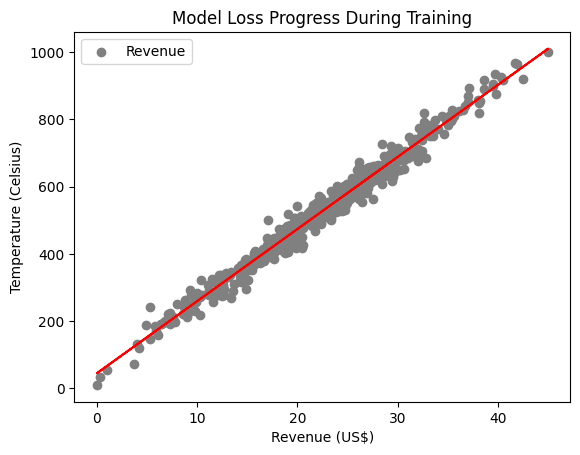

In [144]:
plt.scatter(X_train, y_train, color= 'gray')
plt.title('Model Loss Progress During Training')
plt.plot(X_train , regressor.predict(X_train), color = 'red')
plt.xlabel('Revenue (US$)')
plt.ylabel('Temperature (Celsius)')
plt.legend(['Revenue']);

In [145]:
temp = 5
revenue2 = regressor.predict([[temp]])
revenue_float = float(revenue)
print('The prediction of the model is U$S', revenue2)

The prediction of the model is U$S [[152.04939464]]


In [146]:
X_train = sales_df['Temperature']
y_train = sales_df['Revenue']

y_train.head(10)

0    534.799028
1    625.190122
2    660.632289
3    487.706960
4    316.240194
5    367.940744
6    308.894518
7    696.716640
8     55.390338
9    737.800824
Name: Revenue, dtype: float64

In [147]:
y_train = y_train.values.reshape(-1,1)
X_train = X_train.values.reshape(-1,1)
y_train

array([[ 534.7990284 ],
       [ 625.1901215 ],
       [ 660.6322888 ],
       [ 487.7069603 ],
       [ 316.2401944 ],
       [ 367.9407438 ],
       [ 308.8945179 ],
       [ 696.7166402 ],
       [  55.39033824],
       [ 737.8008241 ],
       [ 325.9684084 ],
       [  71.16015301],
       [ 467.4467066 ],
       [ 289.5409341 ],
       [ 905.4776043 ],
       [ 469.9090332 ],
       [ 648.2099977 ],
       [ 921.508275  ],
       [ 649.5611747 ],
       [ 534.6228653 ],
       [ 612.1539491 ],
       [ 353.3256334 ],
       [ 524.2361154 ],
       [ 374.231135  ],
       [ 523.1245467 ],
       [ 473.6043349 ],
       [ 402.4553204 ],
       [ 679.3177906 ],
       [ 517.5340283 ],
       [ 809.6720534 ],
       [ 528.3804165 ],
       [ 356.0980075 ],
       [ 237.7639106 ],
       [ 418.1372788 ],
       [ 809.4634112 ],
       [ 870.7659159 ],
       [ 550.2785159 ],
       [ 405.6614459 ],
       [ 740.9356848 ],
       [ 501.7329901 ],
       [ 539.6880057 ],
       [ 242.236

In [148]:
from sklearn.neural_network import MLPRegressor
print("Training MLPRegressor...")
est1 = MLPRegressor(activation='logistic', max_iter=100, learning_rate_init=0.1)
est1.fit(X_train, y_train)

Training MLPRegressor...


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(activation='logistic', learning_rate_init=0.1, max_iter=100)

In [149]:
temp = 5
revenue3 = est1.predict([[temp]])
revenue_float = float(revenue)
print('The prediction of the model is U$S', revenue3)

The prediction of the model is U$S [164.07692828]


In [150]:
from sklearn.ensemble import GradientBoostingRegressor
est2 = GradientBoostingRegressor(n_estimators=100, max_depth=4,
                                learning_rate=0.1, loss='huber',
                                random_state=1)
est2.fit(X_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(loss='huber', max_depth=4, random_state=1)

In [151]:
temp = 5
revenue4 = est2.predict([[temp]])
revenue_float = float(revenue)
print('The prediction of the model is U$S', revenue4)

The prediction of the model is U$S [183.76072922]
